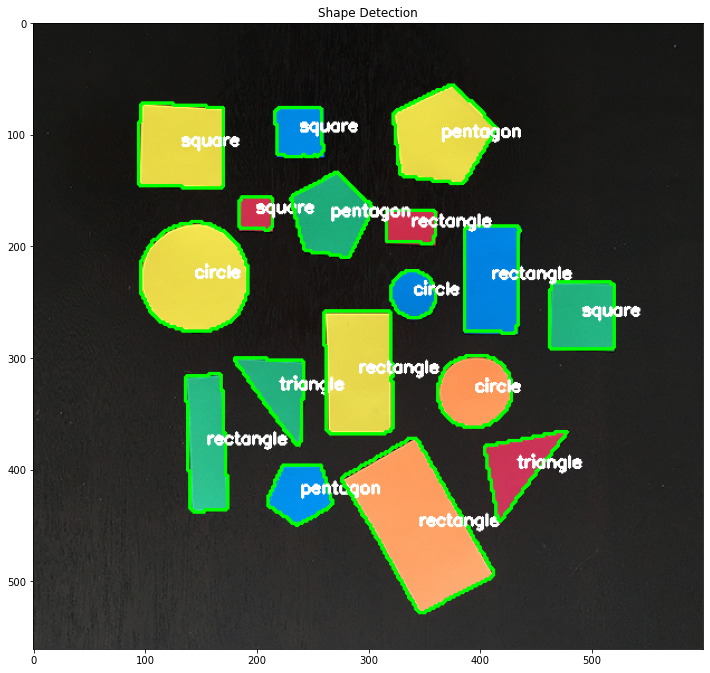

In [6]:
from imutils.shapedetector import ShapeDetector
from imutils.convenience import resize
from matplotlib import pyplot as plt
import cv2

#Create path, load image and resize to a smaller factor so that
#the shapes can be approximaed better
path = r'../images/shapes_and_colors.png'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resized = resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])

#Convert the resized image to grayscale, blur it slightly and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (5,5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

#Find contours in the thresholded image and initialize the shape detect
(cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sd = ShapeDetector()

# loop over the contours
for c in cnts:
    M = cv2.moments(c)
    cX = int((M["m10"] / M["m00"]) * ratio) # compute the center of the contour, then detect the name of the shape using only the contour
    cY = int((M["m01"] / M["m00"]) * ratio)
    shape = sd.detect(c)
    c = c.astype("float")
    c *= ratio # multiply the contour (x, y)-coordinates by the resize ratio,
    c = c.astype("int")
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

#Show the output image via Matplotlib
fig = plt.figure(figsize=(12, 12))
#Ax1
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Shape Detection")
ax.imshow(image)
